In [68]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn.linear_model as sk
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from collections import defaultdict
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [69]:
data = pd.read_csv("/home/shinigami/Downloads/haberman.data",header=None)
data_df = pd.DataFrame(data)
data_df.dropna(inplace=True)
data_df.columns = ['Age','Year','Nodes','Survival_status']
data_df['Survival_status'] = data_df['Survival_status'].astype(int)
data_df['Survival_status'] = data_df['Survival_status'].map({2:0 , 1:1})

In [70]:
def class_percentage(p,n):
    a,b = list(p['Survival_status']).count(1),list(p['Survival_status']).count(0)
    return a*100/n,b*100/n

In [71]:
class0_df = data_df[data_df['Survival_status']!=1]
class1_df = data_df[data_df['Survival_status']!=0]

In [72]:
original_data = data_df.copy(deep=True)
original_data_class0 = class0_df.copy(deep=True)
original_data_class1 = class1_df.copy(deep=True)    

In [73]:
def flip(a):
    sample = a.sample(frac=0.2)
    for i in sample.index:
        a['Survival_status'][i] = int(not a['Survival_status'][i])     

In [74]:
flip(class0_df)
print(class_percentage(class0_df,len(class0_df)))

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(19.753086419753085, 80.24691358024691)


In [75]:
flip(class1_df)
print(class_percentage(class1_df,len(class1_df)))

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(80.0, 20.0)


# OriginalData Train test split

In [76]:
x_train,x_test,y_train,y_test = train_test_split(data_df.loc[:,data_df.columns!='Survival_status'],data_df['Survival_status'],test_size = 0.38)

# Mislabeled Data 

In [77]:
Mislabeled = class0_df.add(class1_df,fill_value=0)

In [78]:
data_df['Survival_status'].value_counts()

1    225
0     81
Name: Survival_status, dtype: int64

In [79]:
Mislabeled['Survival_status'].value_counts()

1.0    196
0.0    110
Name: Survival_status, dtype: int64

In [84]:
print(177/306 , 193/306 , 29/306)

0.5784313725490197 0.630718954248366 0.09477124183006536


In [81]:
X_train,X_test,Y_train,Y_test = train_test_split(Mislabeled.loc[:,Mislabeled.columns!='Survival_status'],Mislabeled['Survival_status'],test_size = 0.38)

# Model Training

In [97]:
rf = SVC()
rf.fit(X_train,Y_train)
predict = rf.predict(x_test)
accuracy_score(y_test,predict)

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6581196581196581

In [98]:
rf_original = SVC()
rf_original.fit(x_train,y_train)
predict_ori = rf_original.predict(x_test)
accuracy_score(y_test,predict_ori)

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6837606837606838

In [99]:
data_df.describe()

,Age,Year,Nodes,Survival_status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.735294
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [108]:
len(data_df['Age'].unique())

49

In [110]:
len(data_df['Year'].unique())

12

In [111]:
len(data_df.drop_duplicates(inplace=False))

289

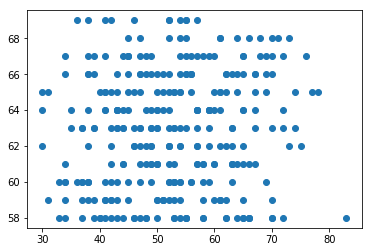

In [112]:
plt.scatter(data_df['Age'] , data_df['Year'])

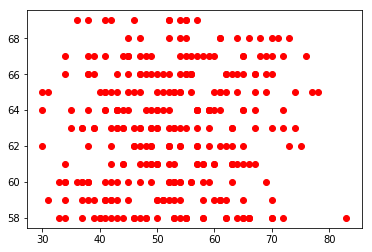

In [119]:
plt.scatter(Mislabeled['Age'] , Mislabeled['Year'] , c='r')

/home/shinigami/anaconda3/envs/myenv/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


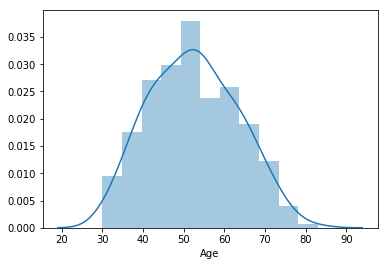

In [115]:
import seaborn as sns
sns.distplot(data_df['Age'])

In [122]:
pd.crosstab(data_df['Age'] , data_df['Survival_status'])

Survival_status,0,1
Age,,
30,0,3
31,0,2
33,0,2
34,2,5
35,0,2
36,0,2
37,0,6
38,1,9
39,1,5
